## Plot the predicted images

In [3]:
import pandas as pd

import setting_module as set_mod
sm = set_mod.SettingModule()

import image_module as img_mod
im = img_mod.ImageModule(sm)

stat_df_unet = pd.read_csv("./summary/teststat_chi37_resize_unet.csv")
stat_df_gl = pd.read_csv("./summary/teststat_chi37_resize_gl.csv")

Setting file is loaded ... ./setting.param


Try to load the existing file: ./summary/summary_chi37.csv...

===== Region [ Chicago ] : 229 images =====
--- Train # : 164 images
--- Valid # : 19 images
---  Test # : 46 images




In [4]:
def arrangeStatFile(stat_df):

    ## Data File
    #stat_df = pd.read_csv(teststat_csv)
#     stat_df.columns.values[0]='nID'
#     df_index=stat_df['nID']
#     stat_df.index = df_index
    stat_df = stat_df.iloc[:,1:]
    stat_df = stat_df.sort_values(['dice'], ascending=False)
    stat_df = stat_df.reset_index(drop=True)
    
    return stat_df

In [5]:
stat_df_unet = arrangeStatFile(stat_df_unet)
stat_df_gl = arrangeStatFile(stat_df_gl)

In [7]:
stat_df_unet

nID          ID  Region class  resize_w  resize_h  n_sample     coord  \
0   183  chicago155       0     T       256       256         1  [(0, 0)]   
1   202    chicago1       0     T       256       256         1  [(0, 0)]   
2   214    chicago4       0     T       256       256         1  [(0, 0)]   
3   192  chicago115       0     T       256       256         1  [(0, 0)]   
4   188  chicago215       0     T       256       256         1  [(0, 0)]   
5   213  chicago211       0     T       256       256         1  [(0, 0)]   
6   206   chicago24       0     T       256       256         1  [(0, 0)]   
7   199  chicago276       0     T       256       256         1  [(0, 0)]   
8   197   chicago72       0     T       256       256         1  [(0, 0)]   
9   227   chicago85       0     T       256       256         1  [(0, 0)]   
10  217    chicago3       0     T       256       256         1  [(0, 0)]   
11  223  chicago316       0     T       256       256         1  [(0, 0)]   
12  205  chicago221       0     T       256       256         1  [(0, 0)]   
13  220  chicago191       0     T       256       256         1  [(0, 0)]   
14  209  chicago279       0     T       256       256         1  [(0, 0)]   
15  196  chicago206       0     T       256       256         1  [(0, 0)]   
16  219  chicago275       0     T       256       256         1  [(0, 0)]   
17  224  chicago424       0     T       256       256         1  [(0, 0)]   
18  207  chicago134       0     T       256       256         1  [(0, 0)]   
19  216  chicago314       0     T       256       256         1  [(0, 0)]   
20  210  chicago266       0     T       256       256         1  [(0, 0)]   
21  211  chicago484       0     T       256       256         1  [(0, 0)]   
22  204   chicago29       0     T       256       256         1  [(0, 0)]   
23  225  chicago178       0     T       256       256         1  [(0, 0)]   
24  187   chicago20       0     T       256       256         1  [(0, 0)]   
25  222   chicago80       0     T       256       256         1  [(0, 0)]   
26  203  chicago440       0     T       256       256         1  [(0, 0)]   
27  195  chicago443       0     T       256       256         1  [(0, 0)]   
28  194  chicago172       0     T       256       256         1  [(0, 0)]   
29  218  chicago493       0     T       256       256         1  [(0, 0)]   
30  228  chicago120       0     T       256       256         1  [(0, 0)]   
31  189  chicago144       0     T       256       256         1  [(0, 0)]   
32  193  chicago141       0     T       256       256         1  [(0, 0)]   
33  212  chicago373       0     T       256       256         1  [(0, 0)]   
34  200  chicago407       0     T       256       256         1  [(0, 0)]   
35  226  chicago176       0     T       256       256         1  [(0, 0)]   
36  190  chicago196       0     T       256       256         1  [(0, 0)]   
37  215   chicago81       0     T       256       256         1  [(0, 0)]   
38  208  chicago334       0     T       256       256         1  [(0, 0)]   
39  198  chicago143       0     T       256       256         1  [(0, 0)]   
40  201  chicago234       0     T       256       256         1  [(0, 0)]   
41  186  chicago481       0     T       256       256         1  [(0, 0)]   
42  221  chicago360       0     T       256       256         1  [(0, 0)]   
43  185   chicago77       0     T       256       256         1  [(0, 0)]   
44  191   chicago27       0     T       256       256         1  [(0, 0)]   
45  184  chicago397       0     T       256       256         1  [(0, 0)]   

     dice    TPR    FPR    PPV    NPV  
0   0.930  0.918  0.014  0.942  0.980  
1   0.929  0.916  0.012  0.941  0.982  
2   0.923  0.902  0.014  0.944  0.975  
3   0.922  0.910  0.017  0.935  0.976  
4   0.921  0.907  0.017  0.936  0.974  
5   0.920  0.931  0.024  0.908  0.982  
6   0.918  0.913  0.017  0.924  0.981  
7   0.911  0.902  0.020  0.920  0.975  
8   0.911  0.894  0.019 

In [8]:
## Pure U-Net
weight_unet = "./weights/bestW_chi37_resize_unet.h5"

from model.u_net import get_unet_256
model = get_unet_256()
model.load_weights(weight_unet)

# # GL-Dense-U-Net
# weight_gl = "./weights/resize_model_best_weights_random47.h5"

# from model.gl_dense_u_net import get_gl_dense_unet
# model_gl = get_gl_dense_unet()
# model_gl.load_weights(weight_gl)

Using TensorFlow backend.


In [9]:
import evaluate_module as em
import matplotlib.pyplot as plt

def plotPredictedImage(row_id, stat_df, model, window_size, doResize):
    
    nID = stat_df['nID'][row_id]
    test_img_id = stat_df['ID'][row_id]
    x_img = im.loadSingleIMG(nID)
    y_pred, y_true = im.predictSingleImage(model, nID, window_size, doResize, False)
    
    dice_coeff = em.getDiceCoeff(y_true,y_pred)
    tpr, fpr, ppv, npv = em.getConfusionMatrix(y_true, y_pred)
    
    #### Tables
    table_cols = ('Dice Score','TPR','FPR','PPV','NPV')
    table_values = [[dice_coeff, tpr, fpr, ppv, npv]]

    #### Figures
    fig1 = plt.figure(figsize=(5,1))
    tx = plt.subplot()
    tx.set_title("Image ID: " + test_img_id + "/ nID:" + str(nID))
    tx.axis('off')
    tx.axis('tight')
    table = tx.table(cellText=table_values, colLabels=table_cols)
    table.auto_set_font_size(False)
    table.set_fontsize(16)
    table.scale(3,4)
    plt.show()

    fig2 = plt.figure(figsize=(36,18))

    plt.subplot(1,3,1)
    plt.imshow(x_img)
    plt.title('Test NRI Image')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(y_true)
    plt.title('True Road')
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(y_pred)
    plt.title('Predicted Road')
    plt.axis('off')

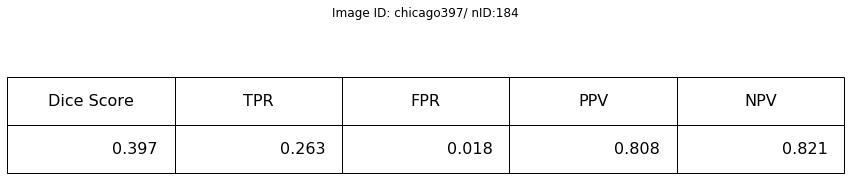

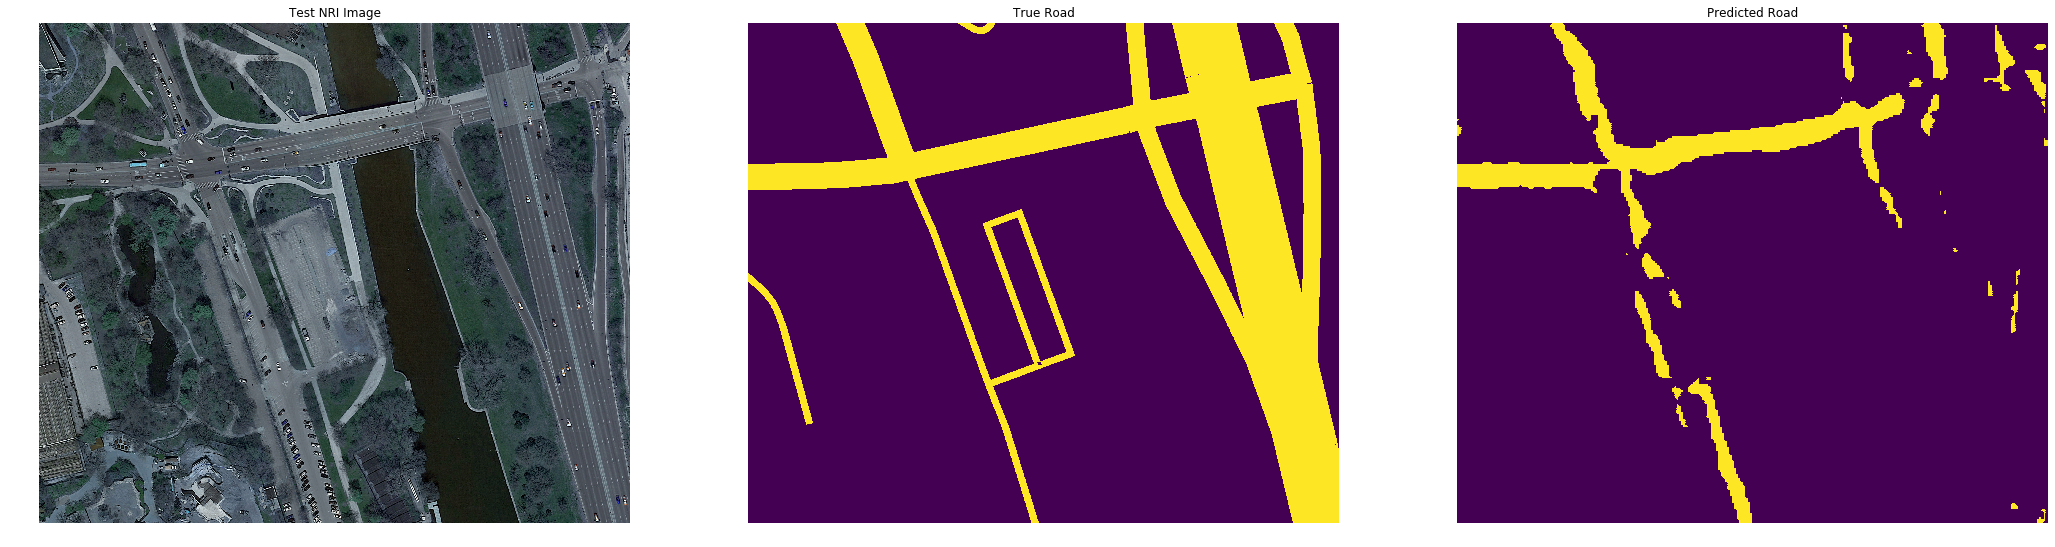

In [13]:
row_id=45

doResize=True
plotPredictedImage(row_id, stat_df_unet, model, im.input_img_size, doResize)